In [1]:
!pip install

ERROR: You must give at least one requirement to install (see "pip help install")


In [2]:
import pandas as pd

# Replace 'your_file_path.csv' with the actual path to your CSV file
df = pd.read_csv('Metro_invt_fs_uc_sfr_sm_month.csv')

# Display the DataFrame
df


,RegionID,SizeRank,RegionName,RegionType,StateName,3/31/2018,4/30/2018,5/31/2018,6/30/2018,7/31/2018,...,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023,11/30/2023,12/31/2023
0,102001,0,United States,country,NaN,1256841.0,1326695.0,1412965.0,1479262.0,1527468.0,...,734588,742155,774262,801169.0,825009.0,844710.0,853587,868725,859587,821812
1,394913,1,"New York, NY",msa,NY,52726.0,57399.0,62374.0,66396.0,68302.0,...,24646,24955,25893,26405.0,26465.0,26021.0,25255,25182,24498,22783
2,753899,2,"Los Angeles, CA",msa,CA,17825.0,19309.0,20822.0,22059.0,23397.0,...,13155,13074,13363,13508.0,13558.0,13635.0,13665,14054,13865,12983
3,394463,3,"Chicago, IL",msa,IL,29930.0,32526.0,35219.0,36854.0,38278.0,...,19674,20028,21008,21656.0,21896.0,22070.0,22066,22496,21952,20302
4,394514,4,"Dallas, TX",msa,TX,22961.0,24748.0,27040.0,29241.0,31113.0,...,16320,17220,19181,20894.0,21860.0,22333.0,22390,22477,22261,21506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,753929,935,"Zapata, TX",msa,TX,55.0,55.0,56.0,66.0,65.0,...,49,50,49,47.0,43.0,42.0,40,37,35,36
924,394743,936,"Ketchikan, AK",msa,AK,66.0,68.0,71.0,81.0,90.0,...,54,58,61,59.0,55.0,53.0,49,45,41,37
925,753874,937,"Craig, CO",msa,CO,114.0,115.0,125.0,147.0,163.0,...,48,56,65,77.0,88.0,98.0,102,104,98,88
926,395188,938,"Vernon, TX",msa,TX,21.0,26.0,32.0,39.0,39.0,...,40,37,40,45.0,53.0,56.0,58,55,54,48


C:\Users\rshaw\AppData\Local\Temp\ipykernel_12676\3098495695.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data_ny_tx[f'Total_{year}'] = selected_data_ny_tx.apply(lambda row: row.filter(like=str(year)).sum(), axis=1)
C:\Users\rshaw\AppData\Local\Temp\ipykernel_12676\3098495695.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data_ny_tx[f'Total_{year}'] = selected_data_ny_tx.apply(lambda row: row.filter(like=str(year)).sum(), axis=1)
C:\Users\rshaw\AppData\Local\Temp\ipykernel_12

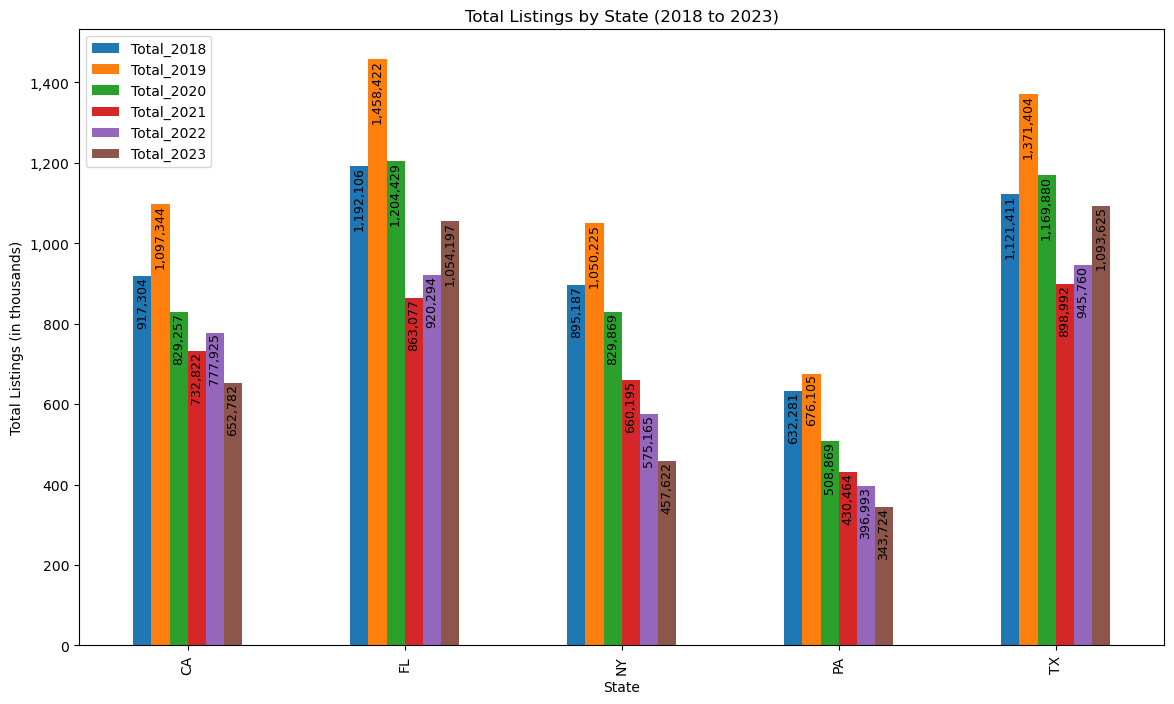

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

df = pd.read_csv('Metro_invt_fs_uc_sfr_sm_month.csv')

selected_columns = ['StateName'] + [col for col in df.columns if any(year in col for year in ['2018', '2019', '2020', '2021', '2022', '2023'])]
selected_data = df[selected_columns]

# Filter the data for proper states
selected_data_ny_tx = selected_data[selected_data['StateName'].isin(['CA', 'FL', 'NY', 'PA', 'TX'])]

# Create a new column for each year and add the values for each 
for year in range(2018, 2024):
    selected_data_ny_tx[f'Total_{year}'] = selected_data_ny_tx.apply(lambda row: row.filter(like=str(year)).sum(), axis=1)

# Group by state and select the total for each year
grouped_df = selected_data_ny_tx.groupby('StateName')[[f'Total_{year}' for year in range(2018, 2024)]].sum()

# Plot the bar chart
ax = grouped_df.plot(kind='bar', figsize=(14, 8))
ax.set_ylabel('Total Listings (in thousands)')
ax.set_xlabel('State')
ax.set_title('Total Listings by State (2018 to 2023)')

# Format y-axis labels to display in thousands
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x / 1000):,}'))

# Annotate each bar with its exact value vertically and make the font bold
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='top',  # Adjust va to 'center' to place text inside the bar
                xytext=(0, 0),  # Adjust xytext for vertical position inside the bar
                textcoords='offset points',
                fontsize=9,
                color='black',
                rotation='vertical')  # Rotate the text vertically

# Save the chart as an image (PNG format in this example)
plt.savefig('bar_chart_with_annotations_vertical.png')

plt.show()


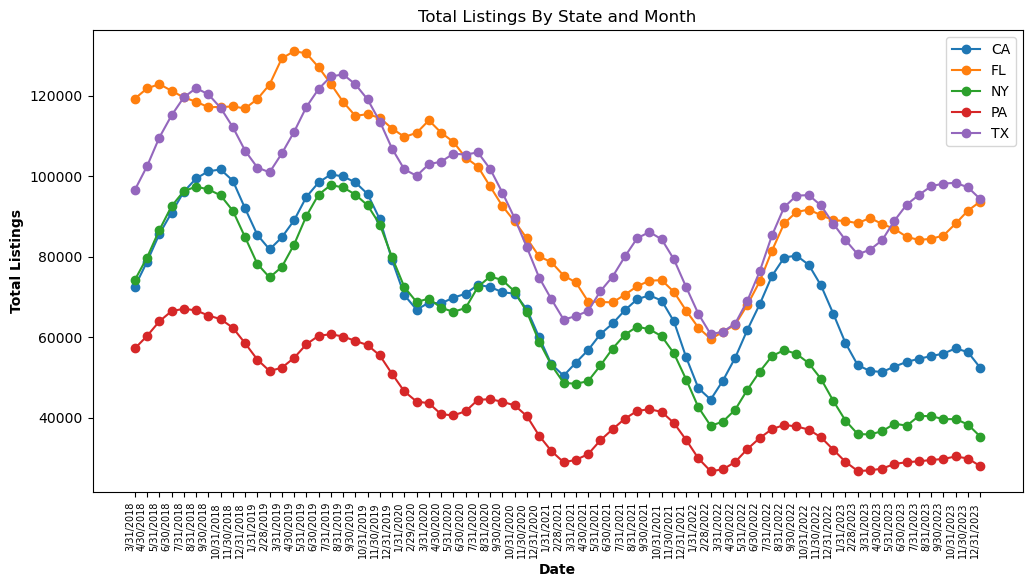

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
df = pd.read_csv('Metro_invt_fs_uc_sfr_sm_month.csv')

# List of states to filter
states_to_filter = ['CA', 'FL', 'NY', 'PA', 'TX']

# Find the index of the '3/31/2018' column
start_column_index = df.columns.get_loc('3/31/2018')

# Prepare data for plotting
data = {'Date': []}

for state_to_filter in states_to_filter:
    data[state_to_filter] = []

for column_index in range(start_column_index, len(df.columns)):
    column_name = df.columns[column_index]
    data['Date'].append(column_name)
    for state_to_filter in states_to_filter:
        column_sum_for_state = df.loc[df['StateName'] == state_to_filter, column_name].sum()
        data[state_to_filter].append(column_sum_for_state)

# Convert data to DataFrame
line_df = pd.DataFrame(data)

# Plot the line chart
plt.figure(figsize=(12, 6))

for state_to_filter in states_to_filter:
    plt.plot(line_df['Date'], line_df[state_to_filter], label=state_to_filter, marker='o')

# Set labels and title
plt.xlabel('Date', fontweight='bold')  # Make 'Date' label bold
plt.ylabel('Total Listings', fontweight='bold')  # Make 'Total Listings' label bold
plt.title('Total Listings By State and Month')

plt.xticks(rotation=90, ha='right', fontsize=7)
    
    
# Show legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right', fontsize=7)

# Save the chart as an image (PNG format in this example)
plt.savefig('total_listings_by_state_and_month.png')

# Display the plot
plt.show()

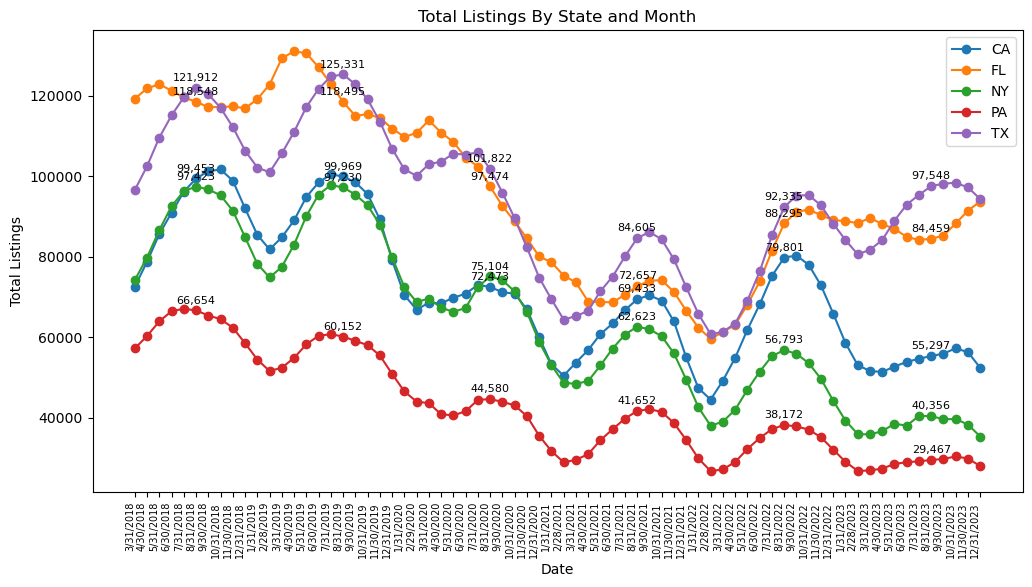

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
df = pd.read_csv('Metro_invt_fs_uc_sfr_sm_month.csv')

# List of states to filter
states_to_filter = ['CA', 'FL', 'NY', 'PA', 'TX']

# Find the index of the '3/31/2018' column
start_column_index = df.columns.get_loc('3/31/2018')

# Prepare data for plotting
data = {'Date': []}

for state_to_filter in states_to_filter:
    data[state_to_filter] = []

# Identify the columns corresponding to August
august_columns = [col for col in df.columns if '8/31' in col]

for column_index in range(start_column_index, len(df.columns)):
    column_name = df.columns[column_index]
    data['Date'].append(column_name)
    for state_to_filter in states_to_filter:
        column_sum_for_state = df.loc[df['StateName'] == state_to_filter, column_name].sum()
        data[state_to_filter].append(column_sum_for_state)

# Convert data to DataFrame
line_df = pd.DataFrame(data)

# Plot the line chart
plt.figure(figsize=(12, 6))

for state_to_filter in states_to_filter:
    plt.plot(line_df['Date'], line_df[state_to_filter], label=state_to_filter, marker='o')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Total Listings')
plt.title('Total Listings By State and Month')

# Show legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right', fontsize=7)

# Annotate each August point with the total listings
for state_to_filter in states_to_filter:
    for col in august_columns:
        total_listings = df.loc[df['StateName'] == state_to_filter, col].sum()
        plt.annotate(f'{int(total_listings):,}',
                     (col, total_listings),
                     textcoords="offset points",
                     xytext=(0, 5),
                     ha='center',
                     fontsize=8)

# Save the chart as an image (PNG format in this example)
plt.savefig('total_listings_by_state_and_month.png')

# Display the plot
plt.show()
